In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from os import listdir
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import pandas as pd
import cv2
import shutil
from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import normalize
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


In [2]:
train_data = pd.read_csv('train_labels.csv')
Neg_cov = train_data[train_data["Label"]==0]
Pos_cov = train_data[train_data["Label"]==1]
# Separate images based on their labels and move them to a different folder
lab0 = len(Neg_cov)
lab1 = len(Pos_cov)
lab_length = lab0 + lab1
lab_length


15264

In [26]:
# Separate the images in the training file into its respective folder
source = r'C:\Users\Nicholas Sigurdsson\Desktop\Eileen ML\stat441fall2021dc2\train\train\train'
destination0 = r'C:\Users\Nicholas Sigurdsson\Desktop\Eileen ML\stat441fall2021dc2\train\train\train_0'
destination1 = r'C:\Users\Nicholas Sigurdsson\Desktop\Eileen ML\stat441fall2021dc2\train\train\train_1'
for i in Neg_cov['File']:
    shutil.move(source + r'\\' + i , destination0)

for j in Pos_cov['File']:
    shutil.move(source + r'\\' + j , destination1)

In [3]:
labels = ['train_0', 'train_1']
path = r'C:\Users\Desktop\Eileen ML\stat441fall2021dc2\train\train'
image_size = 300
def get_images(directory):
    data = [] 
    for label in labels: 
        path = os.path.join(directory, label)
        label_class = labels.index(label)
        for img in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, img))
                resized_array = cv2.resize(image_array, (image_size, image_size)) 
                data.append([resized_array, label_class])
            except Exception as e:
                print(e)
    return np.array(data)

# Load images with label 0
training_images = get_images(path)

  

C:\Users\Nicholas Sigurdsson\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


Text(0.5, 1.0, 'train_1')

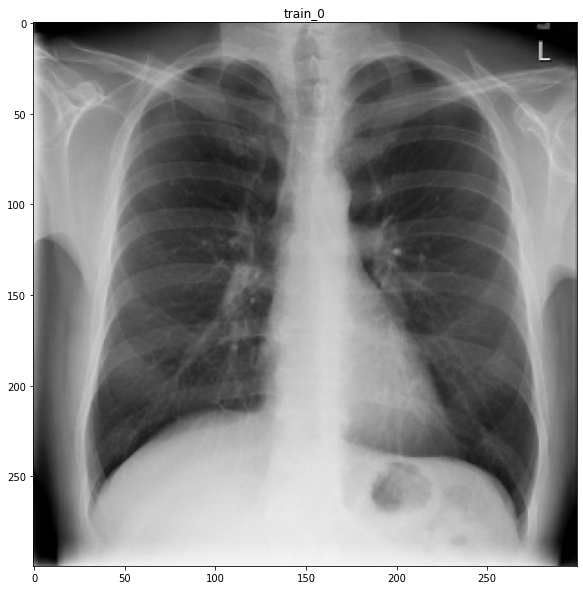

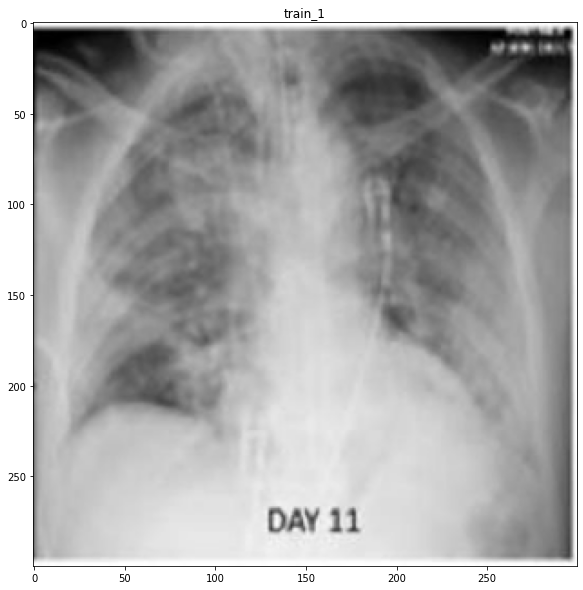

In [4]:
# Visualizing images
plt.figure(figsize=(10,10))
plt.imshow(training_images[10000][0])
plt.title(labels[training_images[10000][1]])

plt.figure(figsize=(10,10))
plt.imshow(training_images[-1][0])
plt.title(labels[training_images[-1][1]])

In [5]:
X_train = []
y_train = []
for data, label in training_images:
    X_train.append(data)
    y_train.append(label)


In [6]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [15]:
#X_train = X_train.reshape([15264, 120000])

In [16]:
#resample = SMOTEENN(sampling_strategy='minority')
#X_train, y_train = resample.fit_resample(X_train, y_train)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [34]:
#X_train = X_train.reshape(17582, 200,200,3)
#X_test = X_test.reshape(4396, 200, 200, 3)

In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(300,300,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu', padding = 'same'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)      

In [14]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])



C:\Users\Nicholas Sigurdsson\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
history = model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=30, validation_data=(X_test, y_test), shuffle = False, callbacks=[callback])

Epoch 1/30
191/191 [==============================] - 278s 1s/step - loss: 0.6002 - accuracy: 0.8921 - val_loss: 0.2393 - val_accuracy: 0.9066
Epoch 2/30
191/191 [==============================] - 271s 1s/step - loss: 0.2301 - accuracy: 0.9093 - val_loss: 0.2178 - val_accuracy: 0.9168
Epoch 3/30
191/191 [==============================] - 267s 1s/step - loss: 0.2058 - accuracy: 0.9191 - val_loss: 0.2061 - val_accuracy: 0.9211
Epoch 4/30
191/191 [==============================] - 270s 1s/step - loss: 0.1904 - accuracy: 0.9263 - val_loss: 0.1907 - val_accuracy: 0.9253
Epoch 5/30
191/191 [==============================] - 264s 1s/step - loss: 0.1697 - accuracy: 0.9333 - val_loss: 0.1789 - val_accuracy: 0.9292
Epoch 6/30
191/191 [==============================] - 263s 1s/step - loss: 0.1514 - accuracy: 0.9404 - val_loss: 0.1794 - val_accuracy: 0.9312
Epoch 7/30
191/191 [==============================] - 263s 1s/step - loss: 0.1420 - accuracy: 0.9442 - val_loss: 0.1738 - val_accuracy: 0.9355

In [20]:
test_data = pd.read_csv('sample_submission.csv')
test_path = r'C:\Users\Desktop\Eileen ML\stat441fall2021dc2\test\test\test'
test_images = []
for img in test_data['File']:
    image_array = cv2.imread(os.path.join(test_path, img))[...,::-1]
    resized_array = cv2.resize(image_array, (300, 300)) 
    test_images.append(resized_array)


In [21]:
test_images = np.array(test_images)

In [22]:
test_images.shape

(400, 300, 300, 3)

In [23]:
prediction = model.predict(test_images)

In [50]:
prediction

array([[9.80224169e-09],
       [1.17385737e-08],
       [1.00000000e+00],
       [2.98801064e-03],
       [9.72114325e-01],
       [1.81391835e-03],
       [7.33675209e-09],
       [5.88287685e-06],
       [1.08127315e-04],
       [1.65194273e-02],
       [8.30127078e-09],
       [9.85638261e-01],
       [9.64754820e-03],
       [9.70794499e-01],
       [9.85565603e-01],
       [1.88887119e-04],
       [6.48583227e-06],
       [9.82037663e-01],
       [9.49989140e-01],
       [7.59701431e-02],
       [9.46174562e-01],
       [6.99040234e-01],
       [2.45747506e-10],
       [3.43661766e-11],
       [7.55311072e-01],
       [3.18467617e-04],
       [9.99911666e-01],
       [3.18452418e-01],
       [5.87487375e-05],
       [5.54820019e-07],
       [4.53065336e-01],
       [2.71076717e-09],
       [9.76871610e-01],
       [1.39366314e-08],
       [7.42188096e-03],
       [9.99995589e-01],
       [7.59401321e-02],
       [2.70716711e-08],
       [9.99684334e-01],
       [9.19013500e-01],


In [45]:
p_test = model.predict(X_test).ravel()

In [46]:
p_test.shape

(3053,)

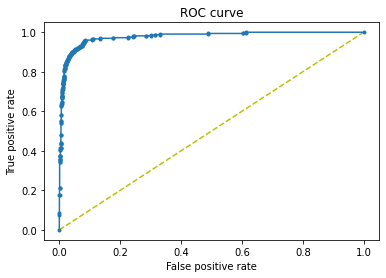

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, p_test)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [42]:
pred = []
for i in prediction:
    if i < 0.0511445:
        pred.append(0)
    else:
        pred.append(1)    

In [43]:
pred

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,


In [44]:
data_pred = {'File': test_data['File'], 'Label': pred}
data_frame = pd.DataFrame(data = data_pred, columns = ['File', 'Label'])
print(data_frame)
np.savetxt("Covid-19 Patients Lungs Detection.csv", data_frame, delimiter=',', header = "File,Label", comments='', fmt='%s, %d')

                    File  Label
0     90421068-27692.jpg      0
1     81279751-18187.jpg      0
2     106361457-9185.jpg      1
3     90365189-46623.jpg      0
4    156334790-39859.jpg      1
..                   ...    ...
395  683122433-34600.jpg      0
396   383352313-1263.jpg      0
397  546427897-30674.jpg      0
398  122350757-55201.jpg      0
399   10368537-46343.jpg      1

[400 rows x 2 columns]


In [76]:
testing = model.predict(X_train)

In [64]:
testing = testing.flatten()
cm = confusion_matrix(y_train, testing)
cm2 = cm/cm.astype(float).sum(axis=1)
cm2

C:\Users\Nicholas Sigurdsson\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


array([[1.        , 0.        ],
       [0.16019988, 0.77833514]])

In [41]:
np.savetxt("Covid-19 Patients Lungs Detection.csv", prediction)